# **Exploratory Data Analysis (EDA) for Mars Weather Analysis**

## **1. Introduction**
### **Dataset Overview**
- The dataset consists of Martian weather data collected by the **REMS instrument on NASA's Curiosity rover**.
- It contains **3,197 records** spanning multiple Martian years, with variables covering **temperature, pressure, UV radiation, and day length**.

### **Objectives of EDA**
- Understand feature relationships and trends.
- Investigate seasonal and cyclical trends for air and ground temperature, mean atmospheric pressure, and UV Radiation.
- Detect outliers and anomalies.

### **Key Questions to Explore**
- Are temperature and pressure correlated?
- How do seasonal and yearly trends affect Martian weather?
- What role does **day length** play in temperature variations?
- Are there **outliers or extreme events** in the dataset?

---

## **2. Data Overview**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
from library.utilities import decompose_adf

### **2.1 Load and Inspect Data**

In [2]:
mars_df = pd.read_csv('../Datasets/mars_weather_cleaned.csv', index_col='sol_number')
mars_df.head()

earth_date_time     Ls  mars_month  mars_year mars_season  \
sol_number                                                             
1               2012-08-07  150.0           6          1      winter   
9               2012-08-15  155.0           6          1      winter   
10              2012-08-16  155.0           6          1      winter   
11              2012-08-17  156.0           6          1      winter   
12              2012-08-18  156.0           6          1      winter   

             sunrise    sunset  day_length  avg_ground_temp  max_ground_temp  \
sol_number                                                                     
1           05:30:00  17:22:00       712.0            -45.5            -16.0   
9           05:28:00  17:22:00       714.0            -45.5            -16.0   
10          05:28:00  17:22:00       714.0            -45.5            -16.0   
11          05:28:00  17:21:00       713.0            -43.5            -11.0   
12          05:28:00  17:21:00       713.0            -47.0            -18.0   

            min_ground_temp  avg_air_temp  max_air_temp  min_air_temp  \
sol_number                                                              
1                     -75.0         -37.5           8.0         -83.0   
9                     -75.0         -37.5           8.0         -83.0   
10                    -75.0         -37.5           8.0         -83.0   
11                    -76.0         -37.0           9.0         -83.0   
12                    -76.0         -37.0           8.0         -82.0   

            mean_pressure  UV_Radiation  
sol_number                               
1                   739.0             4  
9                   739.0             4  
10                  739.0             4  
11                  740.0             4  
12                  741.0             4

### **2.2 Summary Statistics**

In [3]:
mars_df.describe()

Ls   mars_month    mars_year   day_length  avg_ground_temp  \
count  3197.000000  3197.000000  3197.000000  3197.000000      3197.000000   
mean    166.959962     6.083203     3.507038   718.169221       -44.097279   
std     104.356771     3.466172     1.500218    12.036363         7.401663   
min       0.000000     1.000000     1.000000   702.000000       -72.500000   
25%      78.000000     3.000000     2.000000   707.000000       -50.500000   
50%     156.000000     6.000000     3.000000   716.000000       -43.000000   
75%     254.000000     9.000000     5.000000   730.000000       -37.500000   
max     359.000000    12.000000     6.000000   738.000000       -26.500000   

       max_ground_temp  min_ground_temp  avg_air_temp  max_air_temp  \
count      3197.000000      3197.000000   3197.000000   3197.000000   
mean        -13.182828       -75.011730    -39.147357      2.011730   
std          10.489177         5.529929      7.262277      9.398862   
min         -67.000000      -100.000000    -75.500000    -61.000000   
25%         -23.000000       -79.000000    -45.500000     -6.000000   
50%         -12.000000       -75.000000    -38.000000      3.000000   
75%          -4.000000       -71.000000    -33.000000     10.000000   
max          11.000000       -52.000000     -1.500000     24.000000   

       min_air_temp  mean_pressure  UV_Radiation  
count   3197.000000    3197.000000   3197.000000  
mean     -80.306537     828.997028      2.583359  
std        8.824723      57.224328      0.692132  
min     -136.000000     702.000000      1.000000  
25%      -86.000000     785.000000      2.000000  
50%      -80.000000     844.000000      3.000000  
75%      -75.000000     873.000000      3.000000  
max       -8.000000     925.000000      4.000000

---

## 3. Temperature

In [4]:
air_temps_df = mars_df[['avg_air_temp', 'max_air_temp', 'min_air_temp']]
ground_temps_df = mars_df[['avg_ground_temp', 'max_ground_temp',
       'min_ground_temp']]

### 3.1 Air Temperature

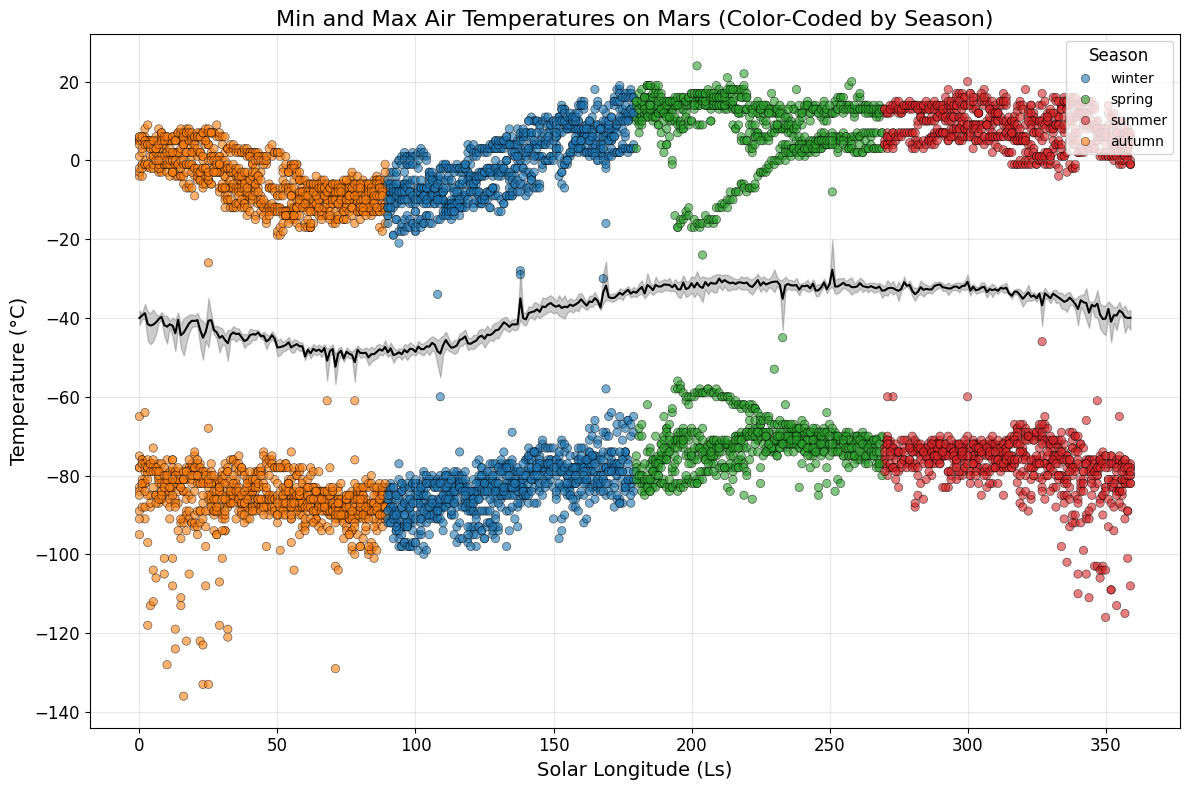

In [5]:
# Define a consistent color palette for the Martian seasons
season_palette = {
    "spring": "#2ca02c",  # Green
    "summer": "#d62728",   # Red
    "autumn": "#ff7f0e",  # Orange
    "winter": "#1f77b4"  # Blue
}

# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot for min air temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='min_air_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Scatter plot for max air temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='max_air_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Line plot for average air temperatures
sns.lineplot(
    data=mars_df,
    x='Ls',
    y='avg_air_temp',
    color='black'
)

# Customize the plot
plt.title('Min and Max Air Temperatures on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

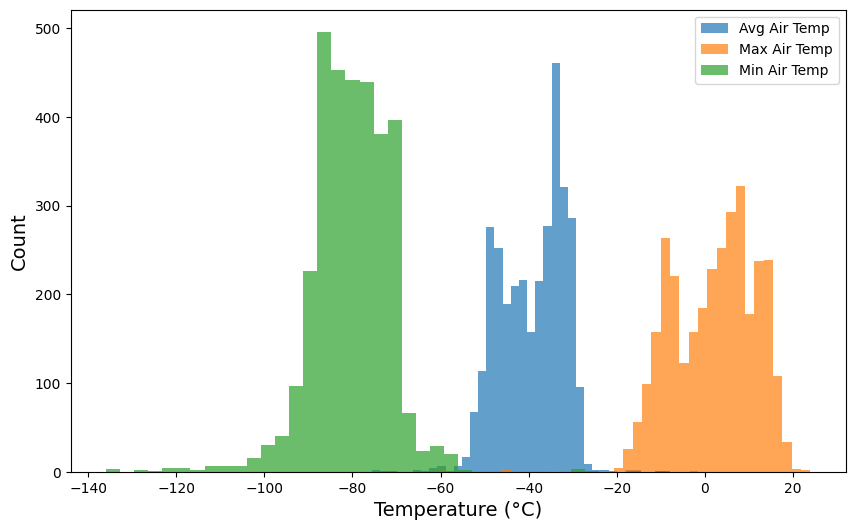

In [6]:
plt.figure(figsize=(10,6))
air_temps_df['avg_air_temp'].hist(bins=40, alpha=0.7, label='Avg Air Temp')
air_temps_df['max_air_temp'].hist(bins=40, alpha=0.7, label='Max Air Temp')
air_temps_df['min_air_temp'].hist(bins=40, alpha=0.7, label='Min Air Temp')
plt.grid(False)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

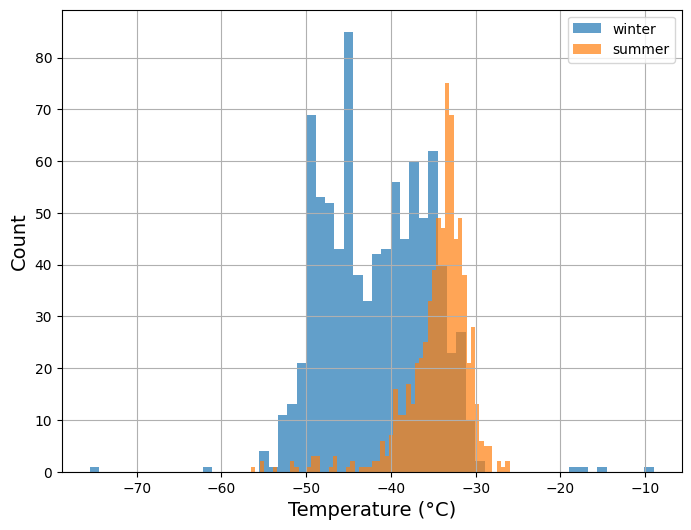

In [7]:
plt.figure(figsize=(8,6))
mars_df[mars_df['mars_season'] == 'winter']['avg_air_temp'].hist(bins=60, alpha=0.7, label='winter')
mars_df[mars_df['mars_season'] == 'summer']['avg_air_temp'].hist(bins=60, alpha=0.7, label='summer')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

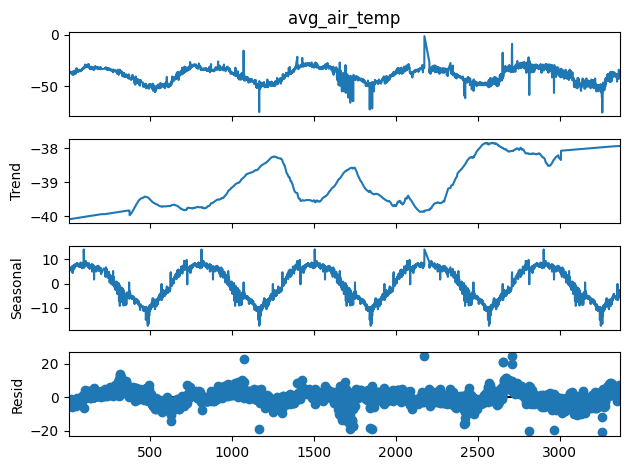

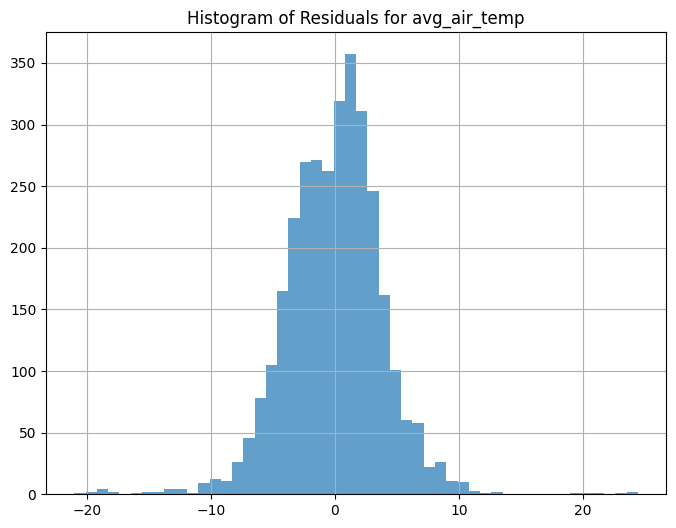

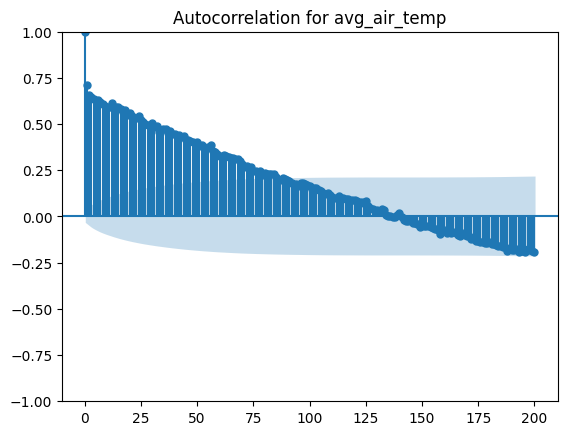


ADF Test Results for avg_air_temp:
1. ADF Statistic: -4.011296905040681
2. P-Value: 0.0013524989523057641
3. Num of Lags: 14
4. Num of Observations: 3182
5. Critical Values:
	1%: -3.4324067514593626
	5%: -2.8624487475060336
	10%: -2.5672537469447287


In [8]:
decompose_adf(mars_df,'avg_air_temp')

<Axes: title={'center': 'Rolling mean for average air temperature over annual periods'}, xlabel='sol_number'>

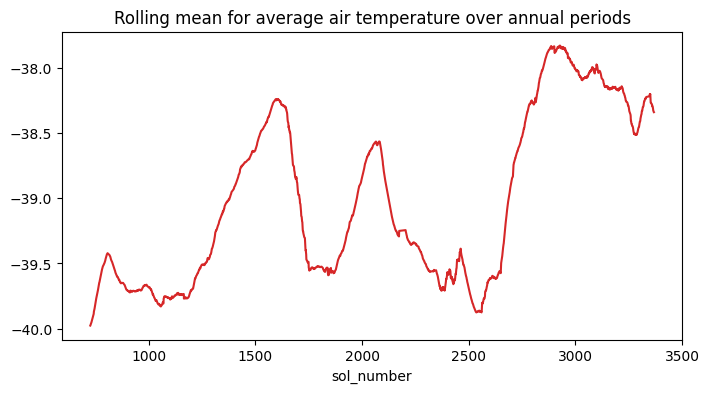

In [9]:
air_temps_df['avg_air_temp'].rolling(window = 668).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean for average air temperature over annual periods")

<Axes: title={'center': 'Rolling variance for average air temperature over annual periods'}, xlabel='sol_number'>

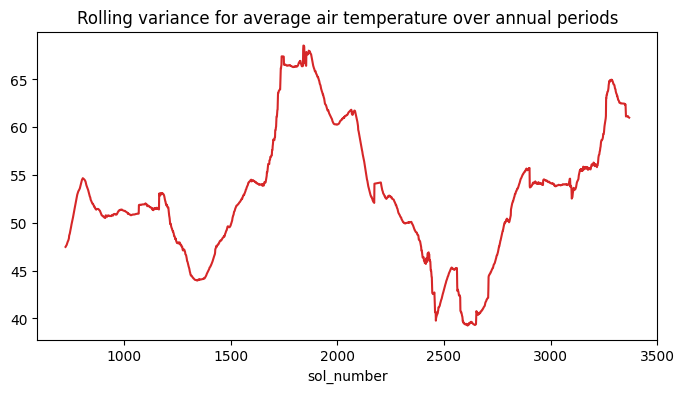

In [10]:
air_temps_df['avg_air_temp'].rolling(window = 668).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance for average air temperature over annual periods")

### 3.2 Ground Temperature

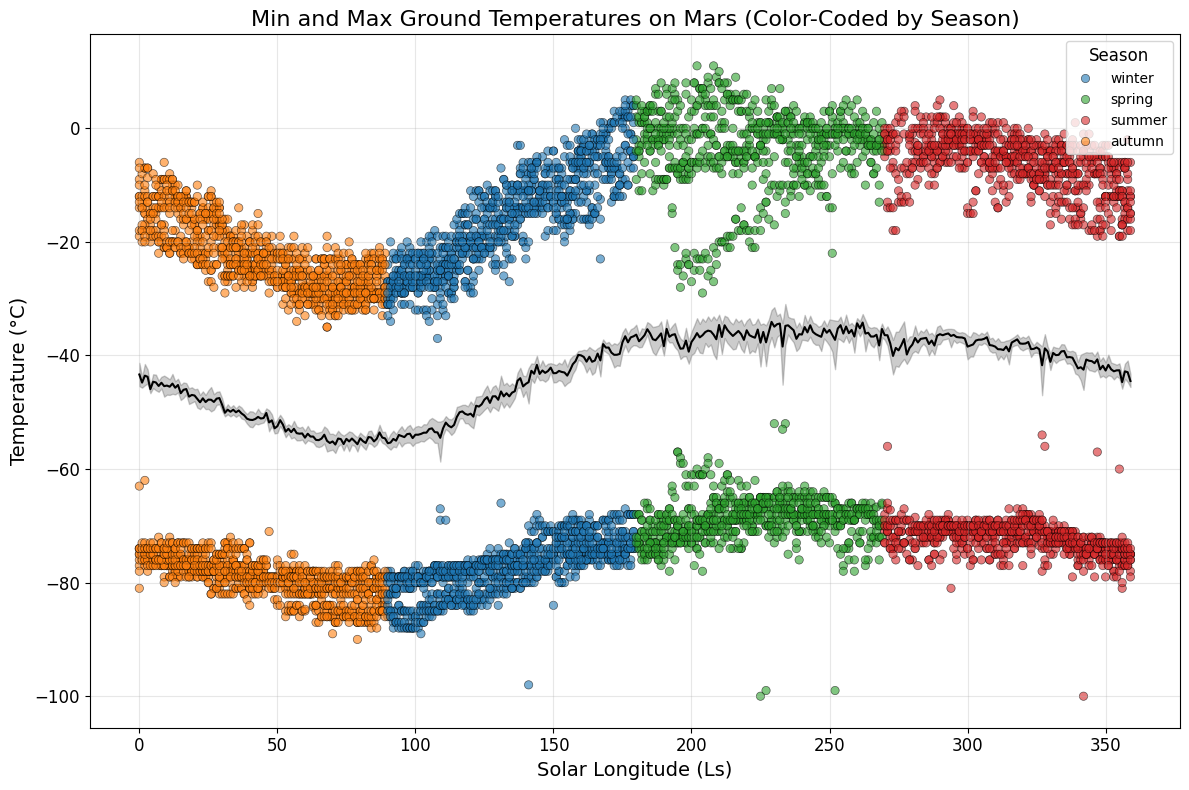

In [11]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot for min ground temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='min_ground_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Scatter plot for max ground temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='max_ground_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Line plot for average ground temperatures
sns.lineplot(
    data=mars_df,
    x='Ls',
    y='avg_ground_temp',
    color='black'
)

# Customize the plot
plt.title('Min and Max Ground Temperatures on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

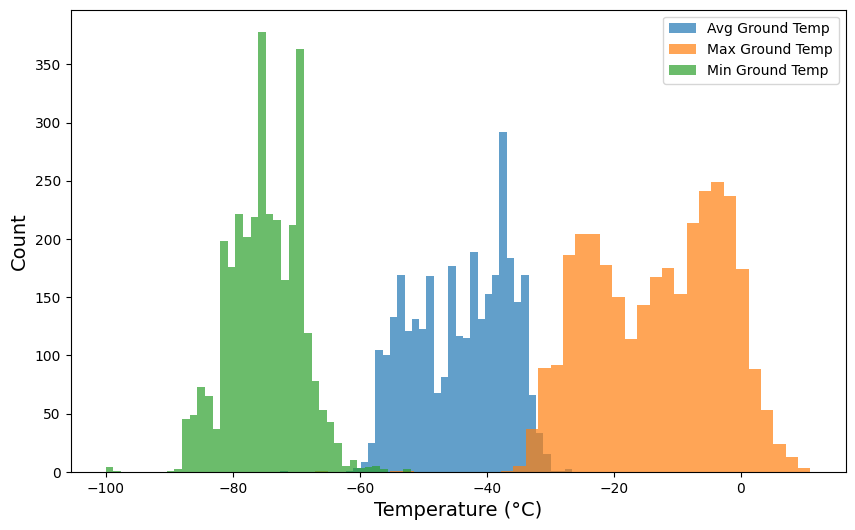

In [12]:
plt.figure(figsize=(10,6))
ground_temps_df['avg_ground_temp'].hist(bins=40, alpha=0.7, label='Avg Ground Temp')
ground_temps_df['max_ground_temp'].hist(bins=40, alpha=0.7, label='Max Ground Temp')
ground_temps_df['min_ground_temp'].hist(bins=40, alpha=0.7, label='Min Ground Temp')
plt.grid(False)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

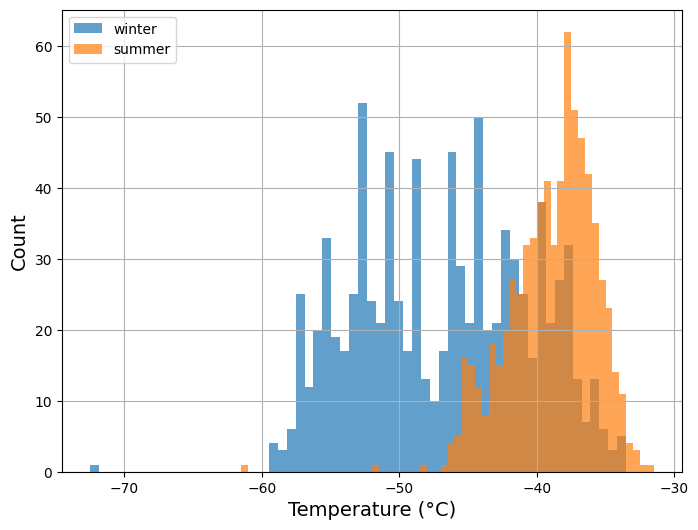

In [13]:
plt.figure(figsize=(8,6))
mars_df[mars_df['mars_season'] == 'winter']['avg_ground_temp'].hist(bins=60, alpha=0.7, label='winter')
mars_df[mars_df['mars_season'] == 'summer']['avg_ground_temp'].hist(bins=60, alpha=0.7, label='summer')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

It appears that ground temperature holds all the same seasonal trends while maintaining seasonal trends and the temperature impact from the global dust storm in 2018.

Ground temperature is likely to be a superior predictor for martian temperature. Do hypothesis testing to confirm.

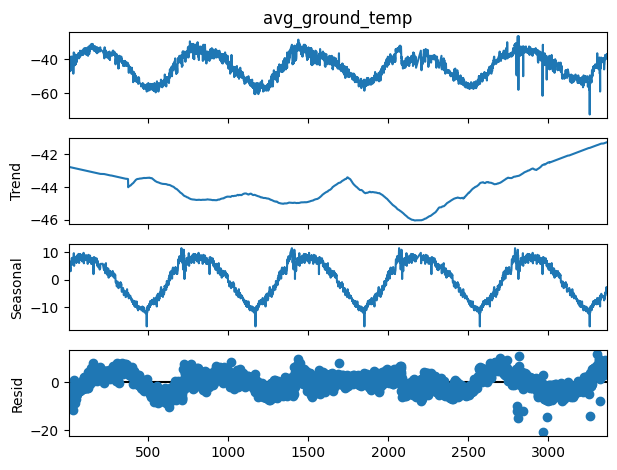

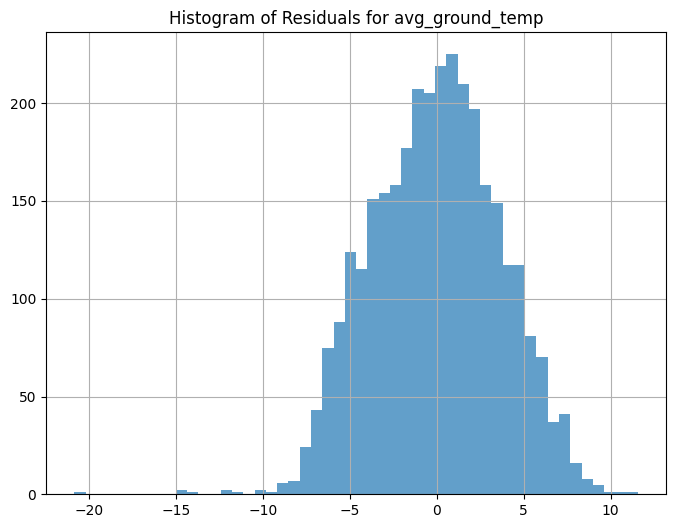

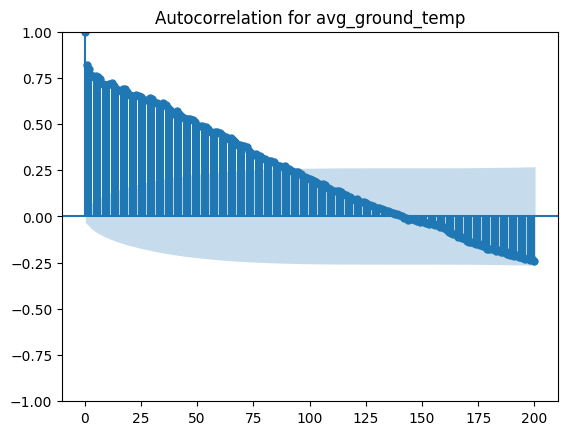


ADF Test Results for avg_ground_temp:
1. ADF Statistic: -2.6411351794899924
2. P-Value: 0.08478994166886011
3. Num of Lags: 28
4. Num of Observations: 3168
5. Critical Values:
	1%: -3.4324158480194886
	5%: -2.862452765302856
	10%: -2.5672558859467465


In [14]:
decompose_adf(mars_df, 'avg_ground_temp')

<Axes: title={'center': 'Rolling mean for average ground temperature over annual periods'}, xlabel='sol_number'>

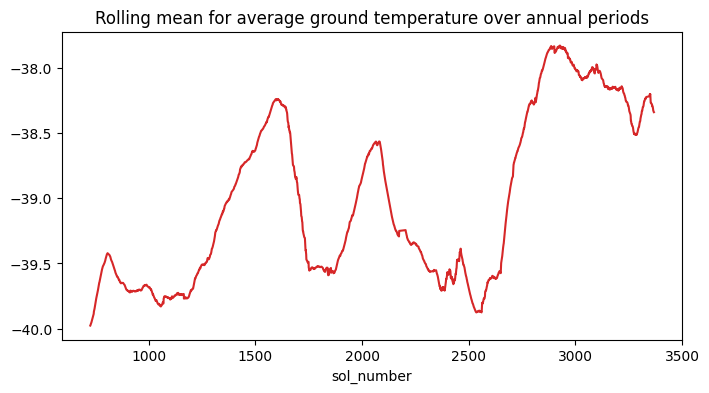

In [15]:
air_temps_df['avg_air_temp'].rolling(window = 668).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean for average ground temperature over annual periods")

<Axes: title={'center': 'Rolling variance for average ground temperature over annual periods'}, xlabel='sol_number'>

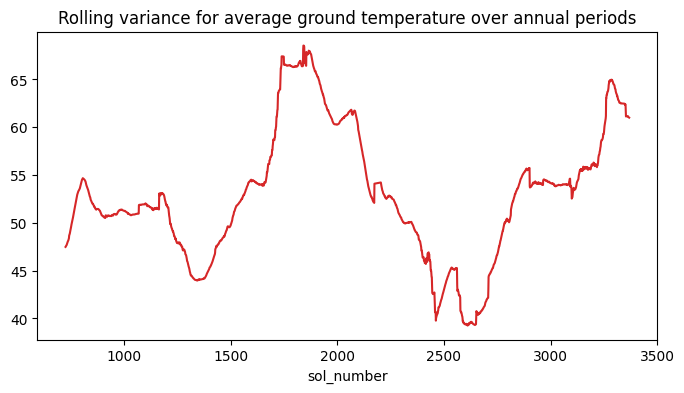

In [16]:
air_temps_df['avg_air_temp'].rolling(window = 668).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance for average ground temperature over annual periods")

### 3.3 Temperature Difference

In [17]:
temp_diff_df = pd.DataFrame(index=mars_df.index)
temp_diff_df['avg_diff'] = mars_df['avg_air_temp'] - mars_df['avg_ground_temp']
temp_diff_df['max_diff'] = mars_df['max_air_temp'] - mars_df['max_ground_temp']
temp_diff_df['min_diff'] = mars_df['min_air_temp'] - mars_df['min_ground_temp']

---

## 4. Atmospheric Pressure

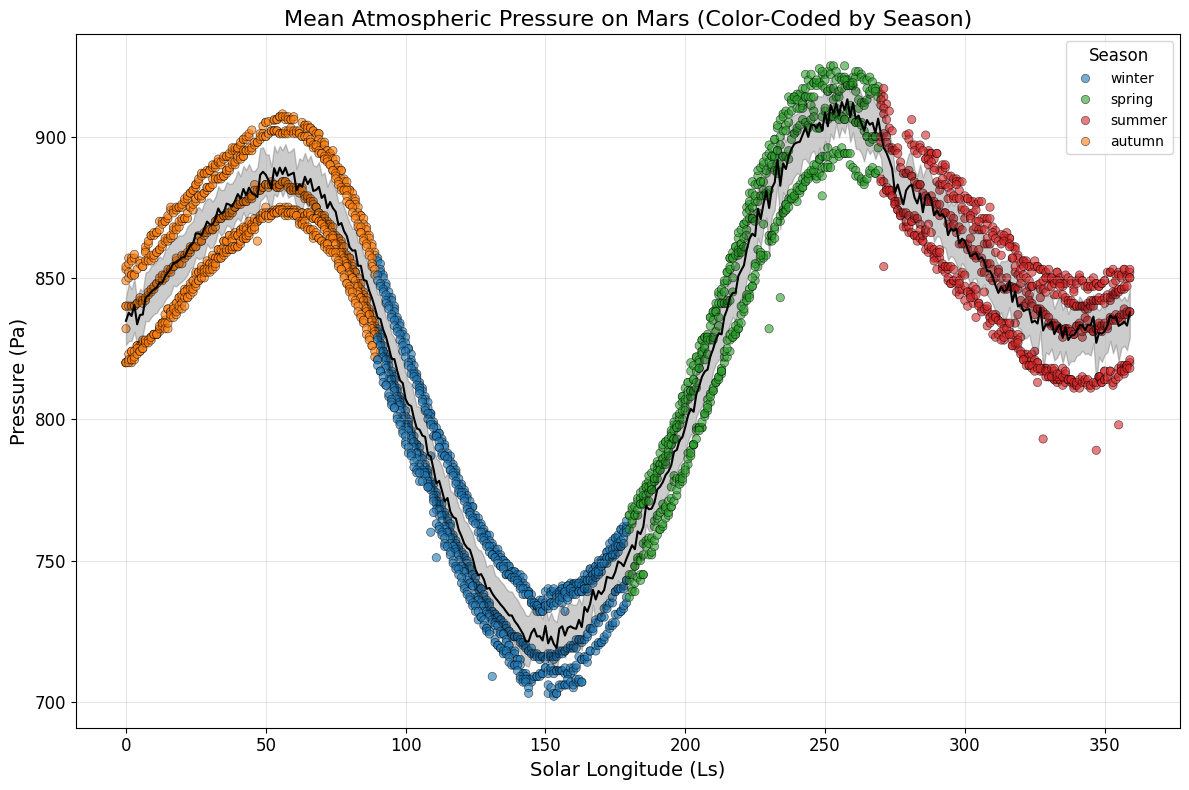

In [18]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot for min air temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='mean_pressure',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)


# Line plot for average air temperatures
sns.lineplot(
    data=mars_df,
    x='Ls',
    y='mean_pressure',
    color='black'
)

# Customize the plot
plt.title('Mean Atmospheric Pressure on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Pressure (Pa)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

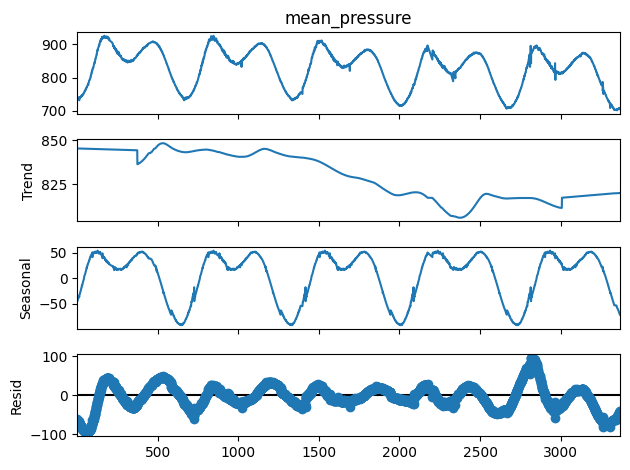

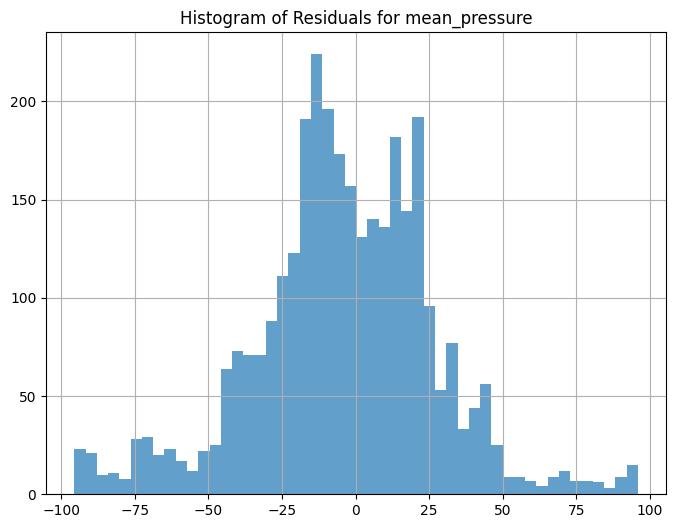

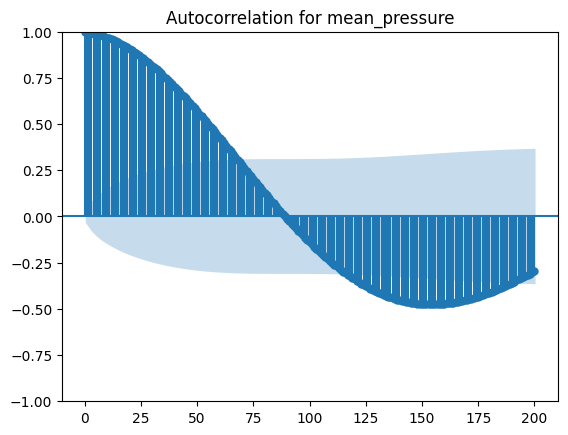


ADF Test Results for mean_pressure:
1. ADF Statistic: -7.510178575894843
2. P-Value: 4.034963642059138e-11
3. Num of Lags: 24
4. Num of Observations: 3172
5. Critical Values:
	1%: -3.4324132408020374
	5%: -2.8624516137402374
	10%: -2.5672552728755234


In [19]:
decompose_adf(mars_df,'mean_pressure')

<Axes: title={'center': 'Rolling mean for atmospheric pressure over annual periods'}, xlabel='sol_number'>

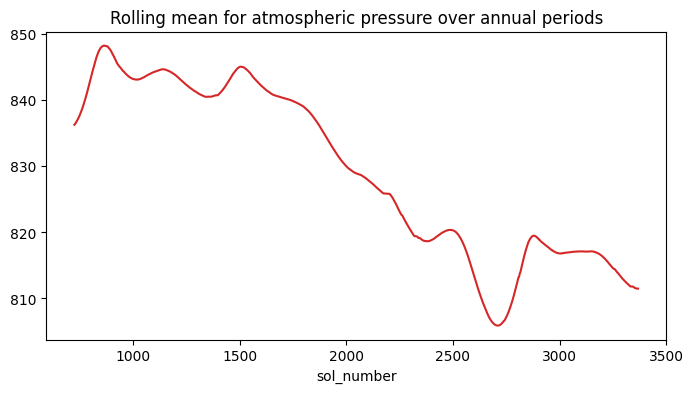

In [20]:
mars_df['mean_pressure'].rolling(window = 668).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean for atmospheric pressure over annual periods")

<Axes: title={'center': 'Rolling variance for atmospheric pressure over annual periods'}, xlabel='sol_number'>

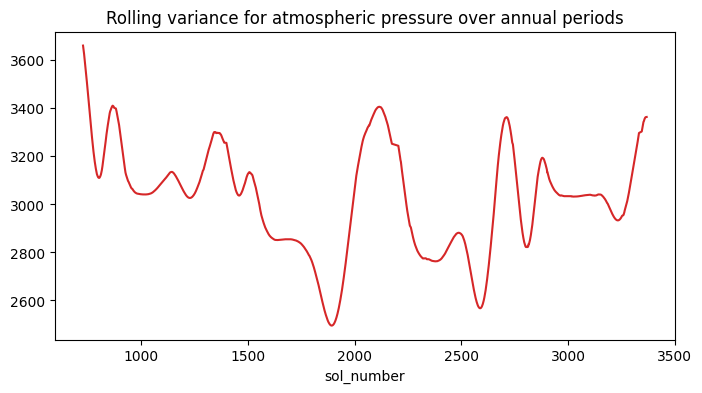

In [21]:
mars_df['mean_pressure'].rolling(window = 668).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance for atmospheric pressure over annual periods")

---

## 5. UV Radiation

<Axes: title={'center': 'Rolling mean over annual periods'}, xlabel='sol_number'>

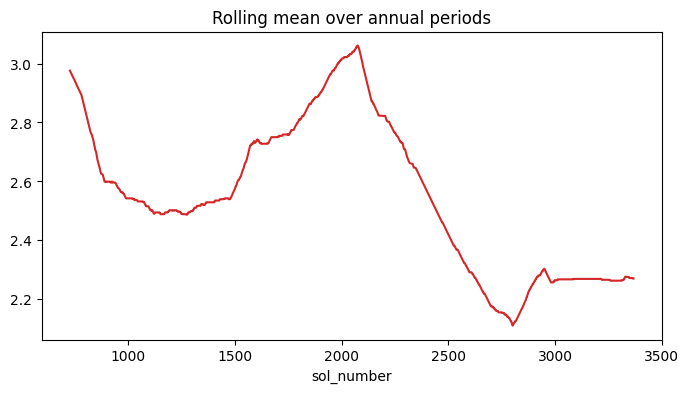

In [22]:
mars_df['UV_Radiation'].rolling(window = 668).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over annual periods")

---

## 6. Day Length

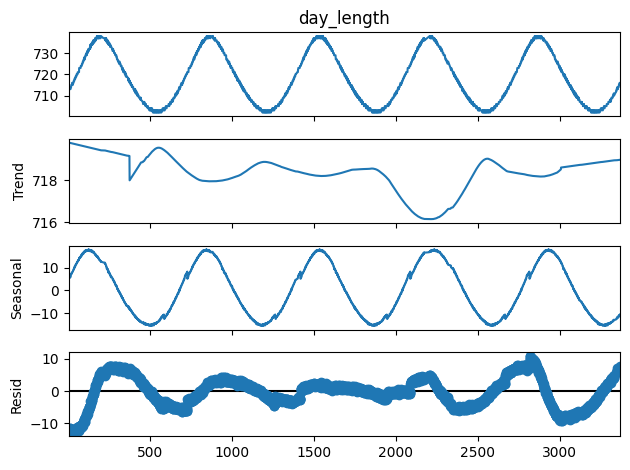

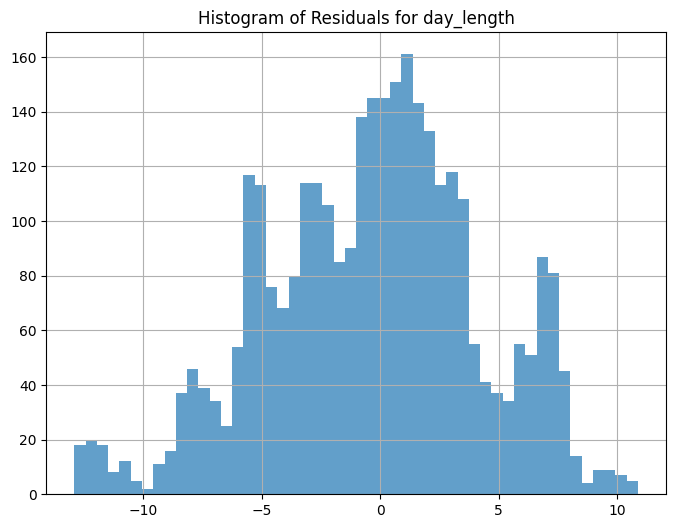

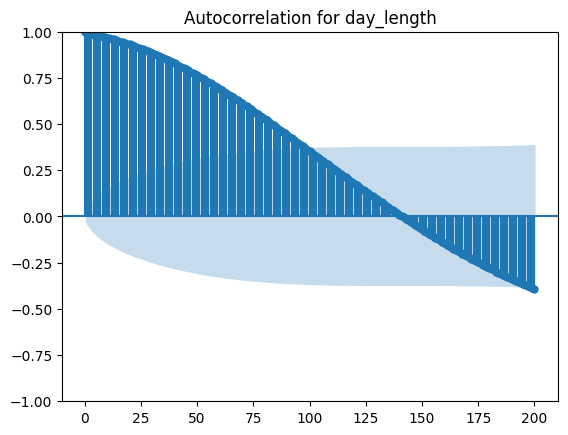


ADF Test Results for day_length:
1. ADF Statistic: -3.804877698664847
2. P-Value: 0.002857802164451381
3. Num of Lags: 28
4. Num of Observations: 3168
5. Critical Values:
	1%: -3.4324158480194886
	5%: -2.862452765302856
	10%: -2.5672558859467465


In [23]:
decompose_adf(mars_df, 'day_length')

---

## 7. Correlation Between Features

In [24]:
features = ['Ls',
            'day_length', 
            'avg_ground_temp', 
            'max_ground_temp',
            'min_ground_temp', 
            'avg_air_temp', 
            'max_air_temp', 
            'min_air_temp',
            'mean_pressure', 
            'UV_Radiation']
key_features = ['Ls', 
                'day_length', 
                'avg_ground_temp', 
                'avg_air_temp', 
                'mean_pressure', 
                'UV_Radiation']
sns.set(rc={"figure.figsize":(16, 8)})

### 7.1 Annual Trends

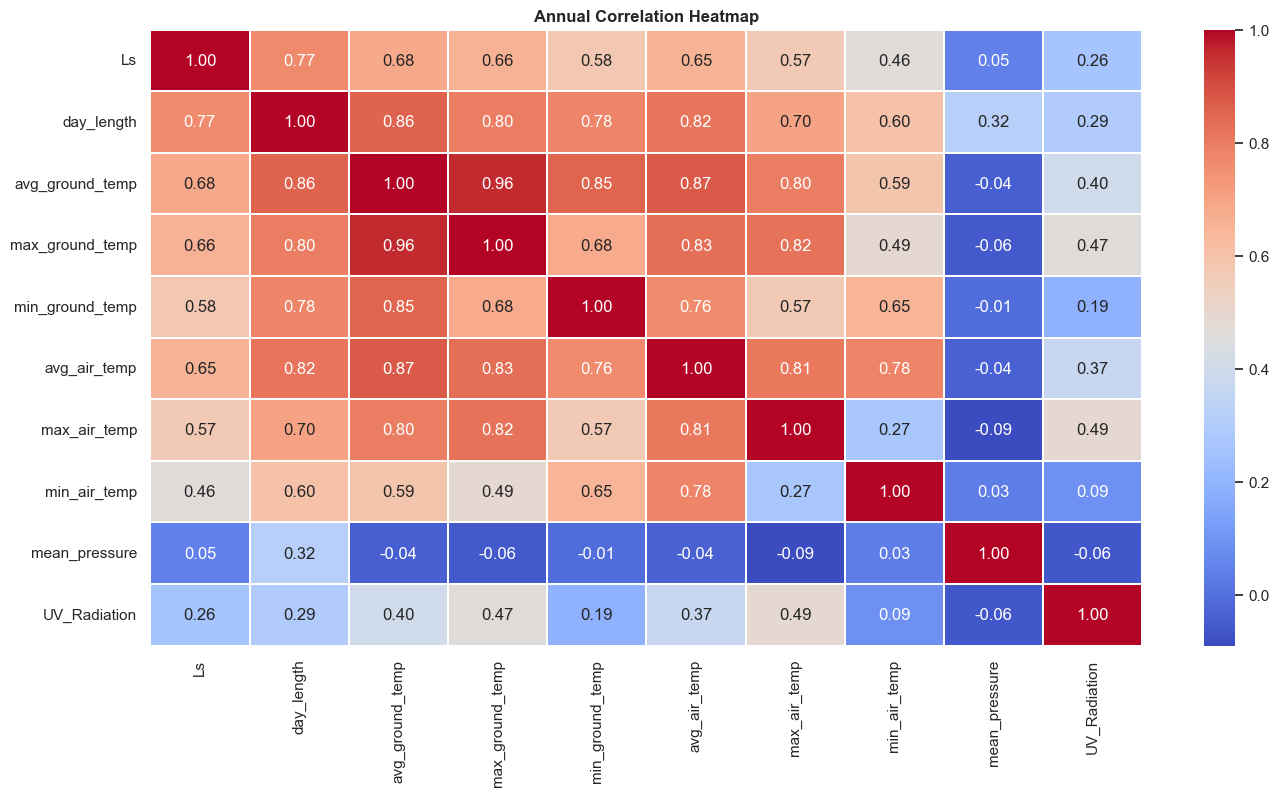

In [25]:
corr = mars_df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Annual Correlation Heatmap', weight='bold')
plt.show()

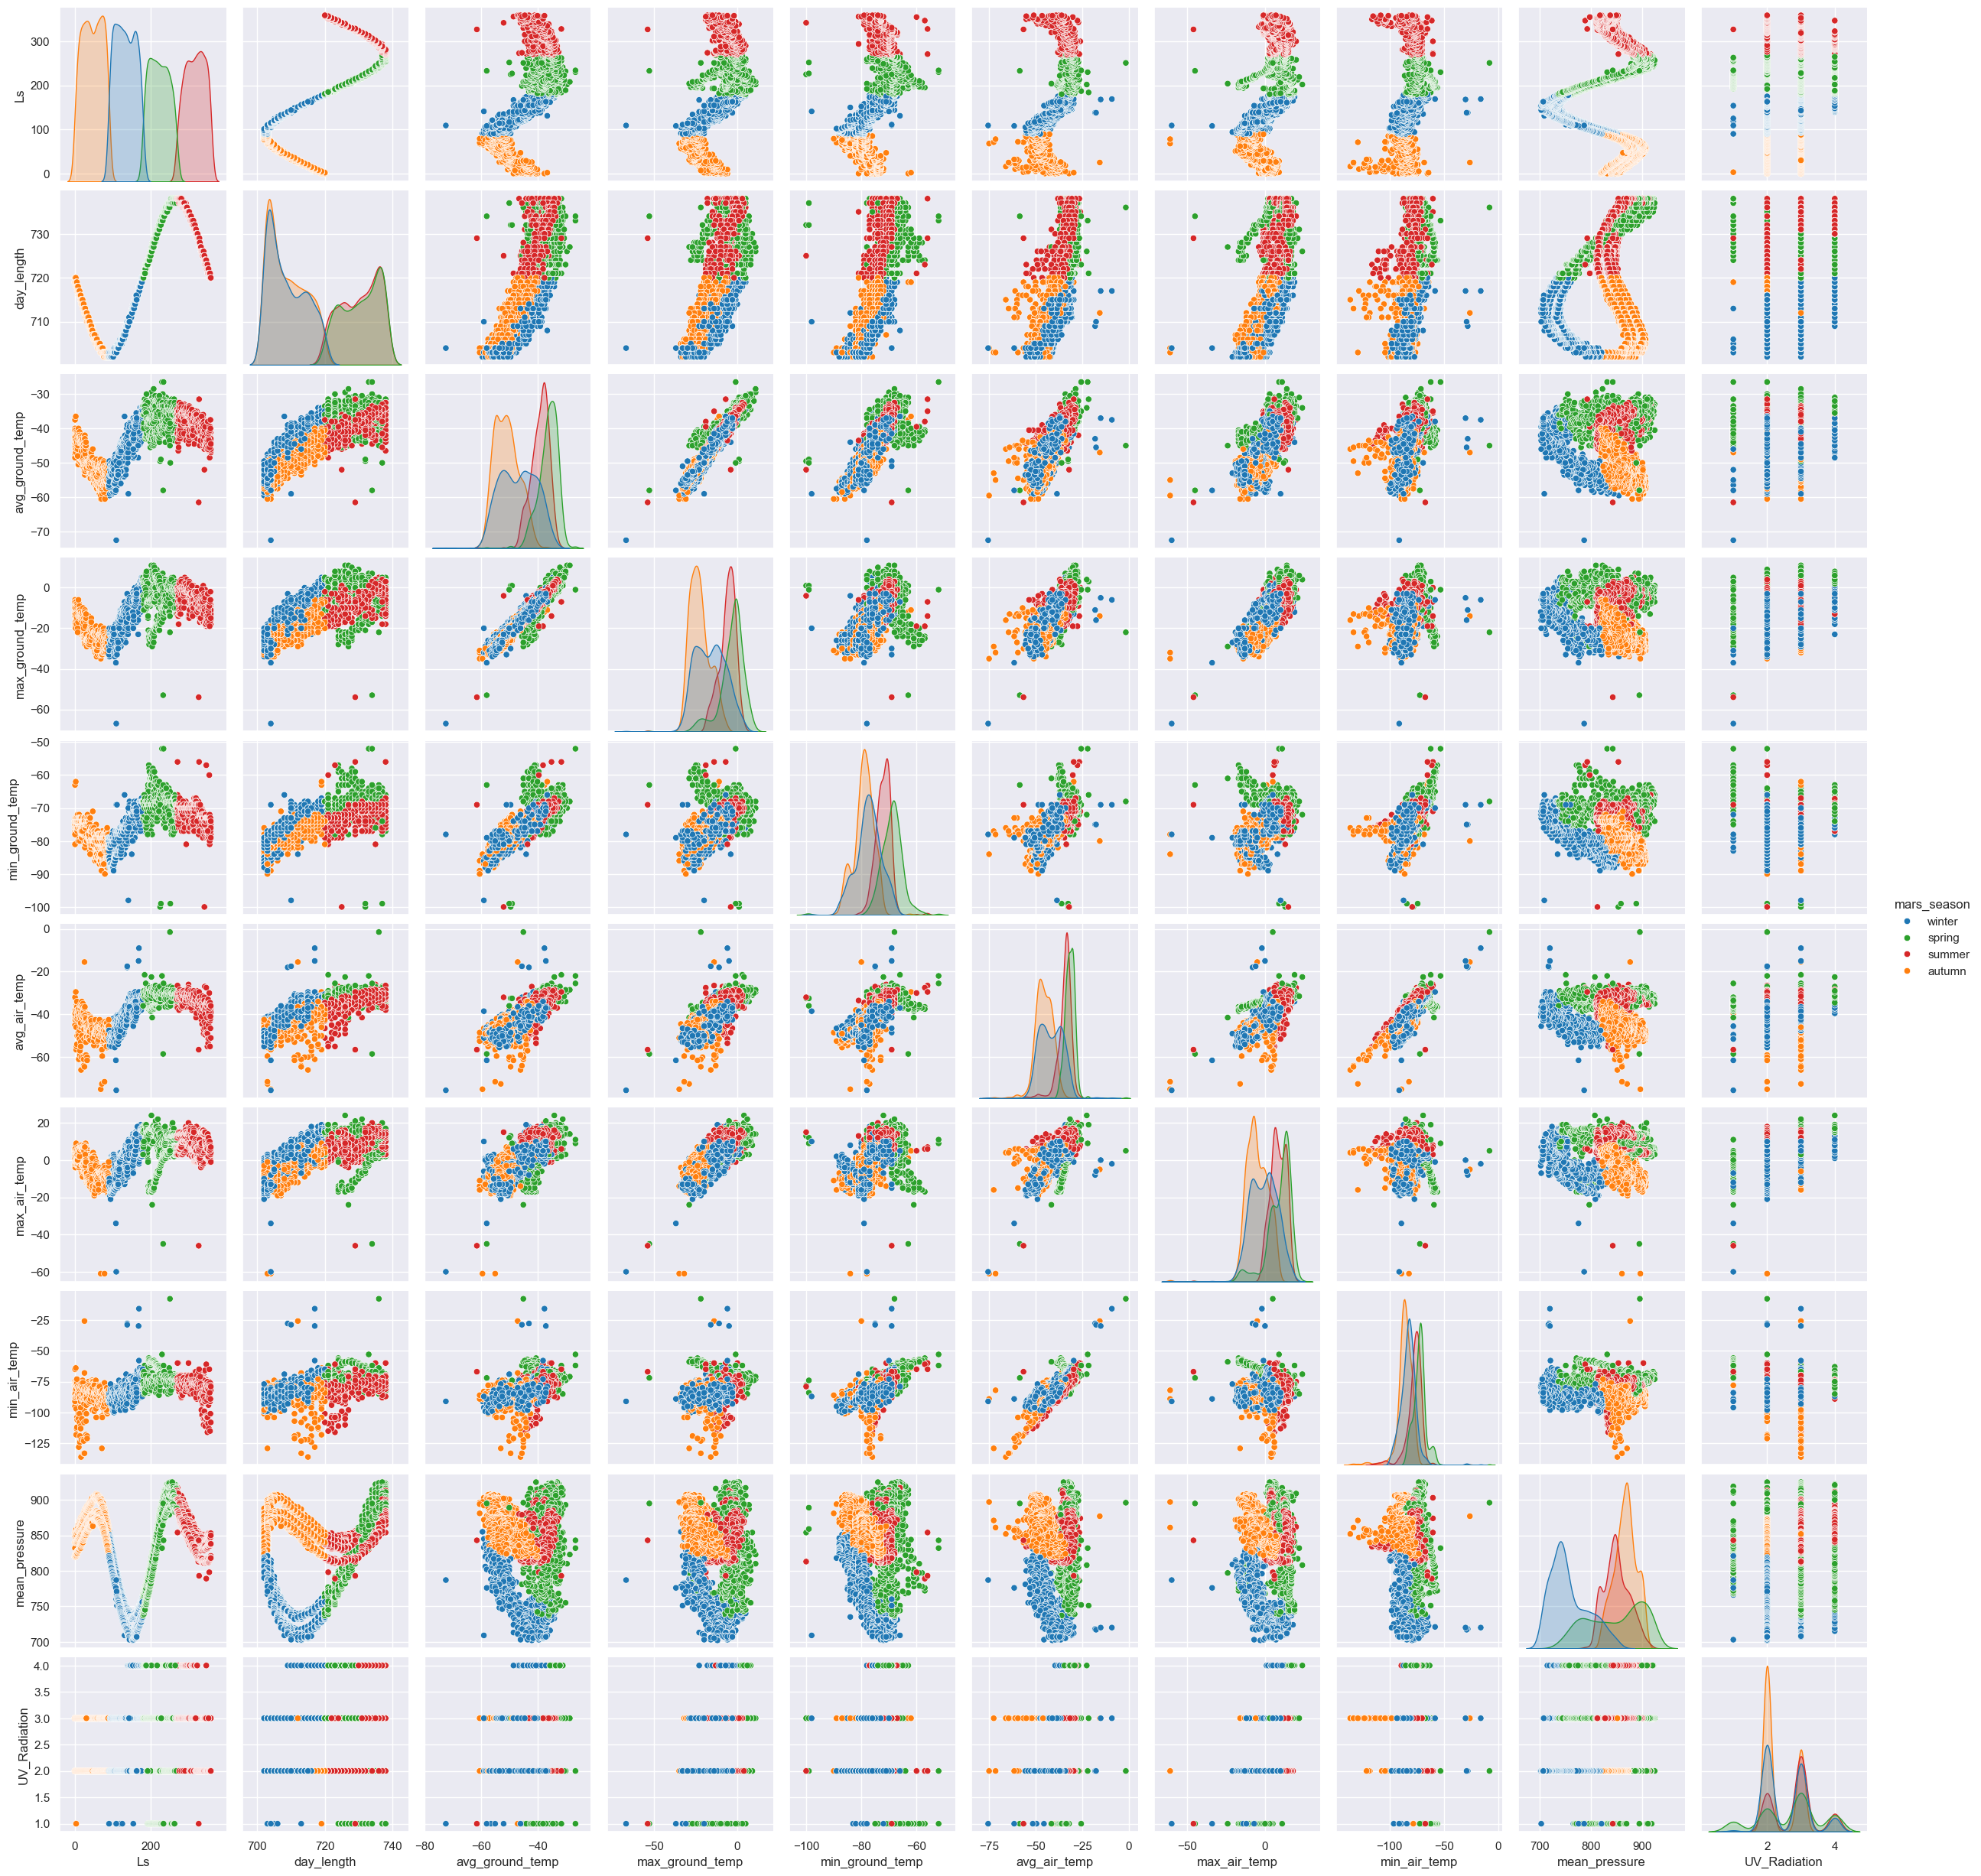

In [26]:
sns.pairplot(mars_df[features + ['mars_season']], hue='mars_season', palette=season_palette)
plt.show()

### 7.2 Seasonal Trends

#### Winter

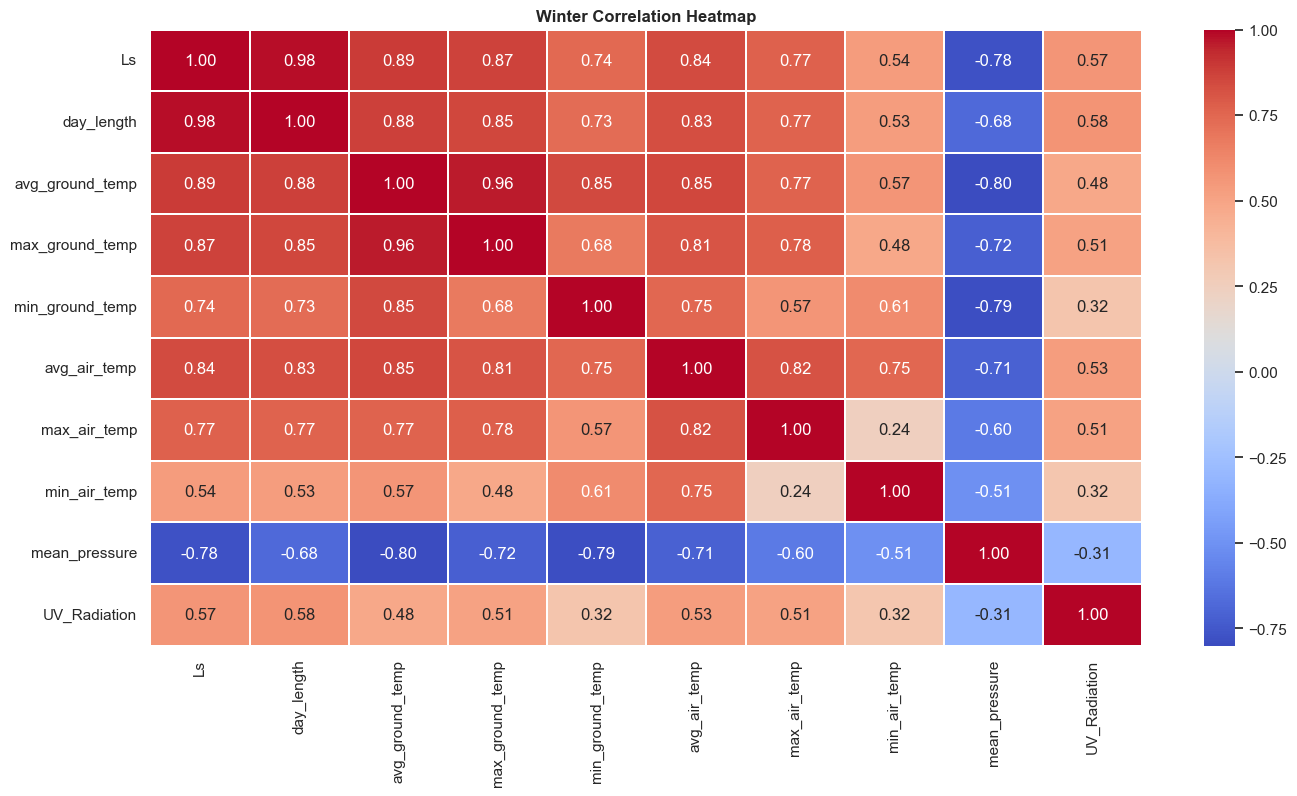

In [27]:
corr_winter = mars_df[mars_df['mars_season'] == 'winter'][features].corr()
sns.heatmap(corr_winter, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Winter Correlation Heatmap', weight='bold')
plt.show()

#### Spring

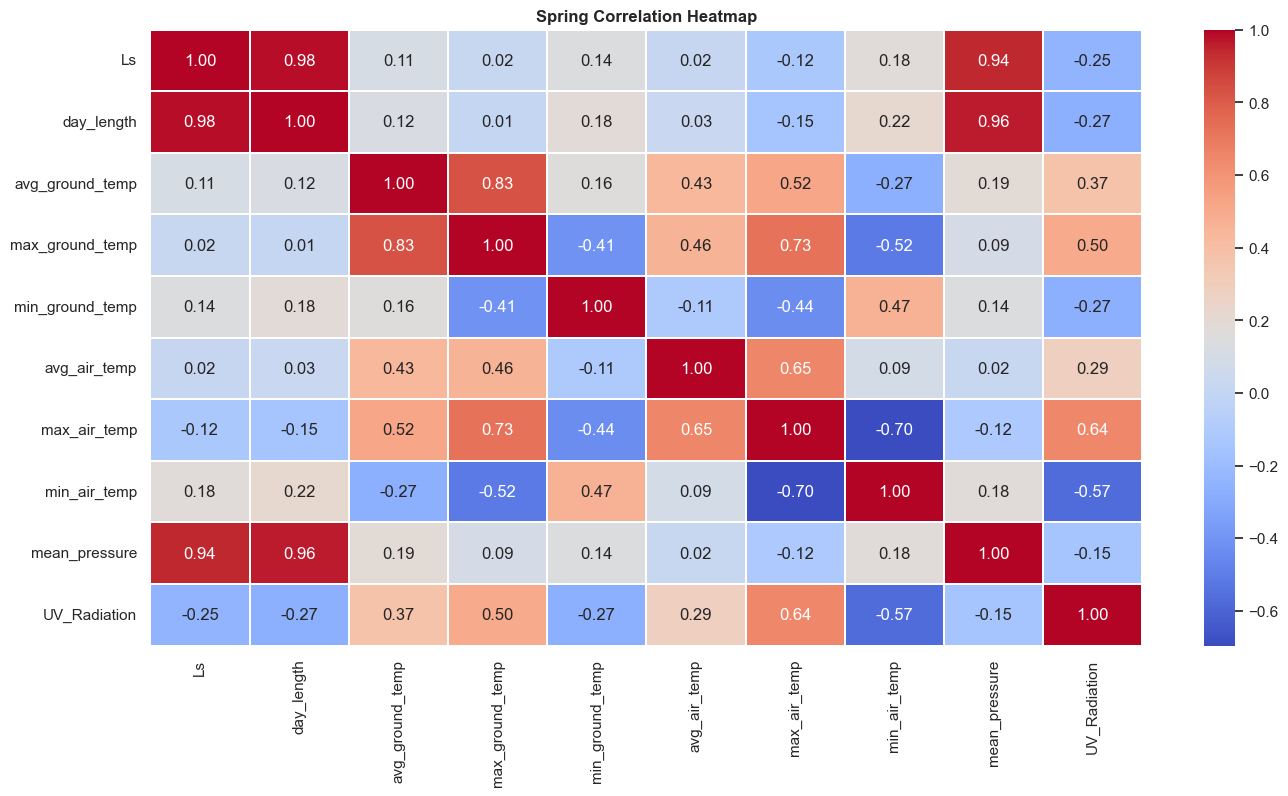

In [28]:
corr_spring = mars_df[mars_df['mars_season'] == 'spring'][features].corr()
sns.heatmap(corr_spring, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Spring Correlation Heatmap', weight='bold')
plt.show()

#### Summer

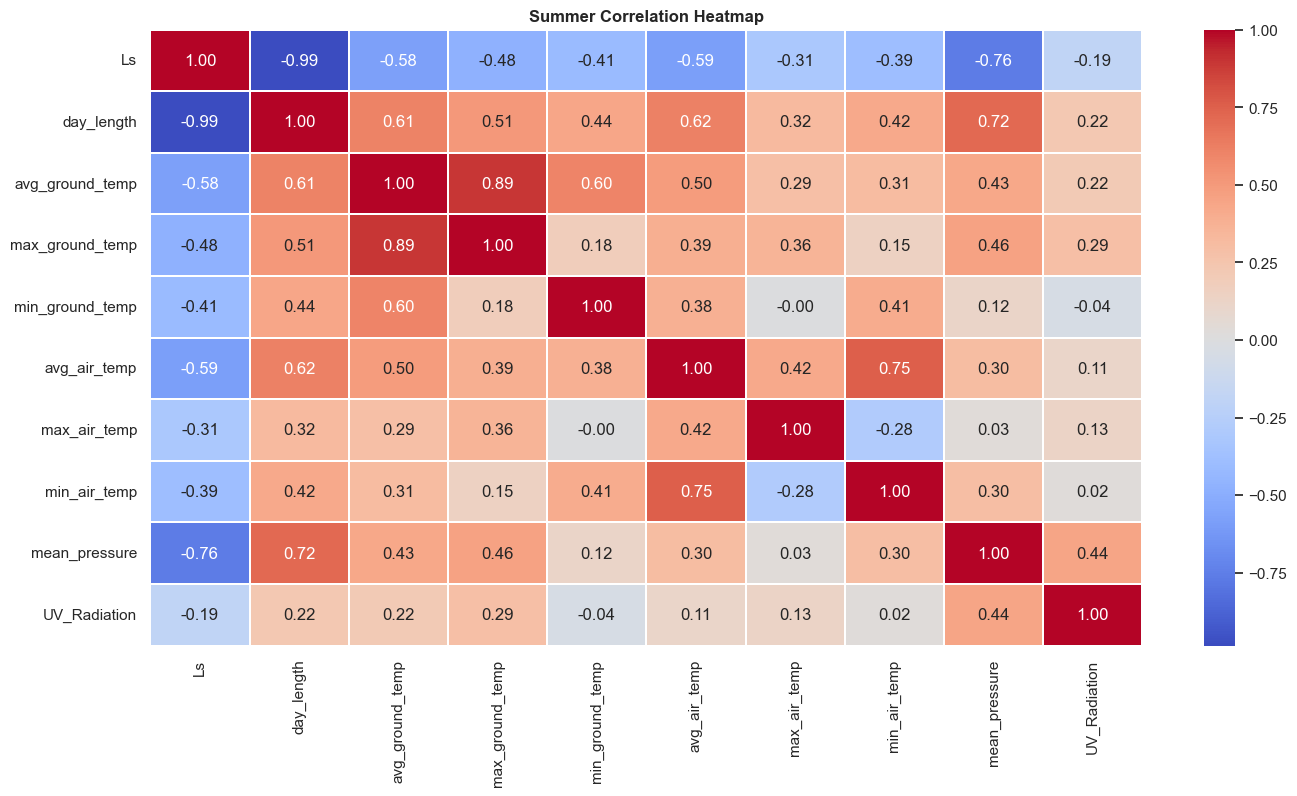

In [29]:
corr_summer = mars_df[mars_df['mars_season'] == 'summer'][features].corr()
sns.heatmap(corr_summer, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Summer Correlation Heatmap', weight='bold')
plt.show()

#### Autumn

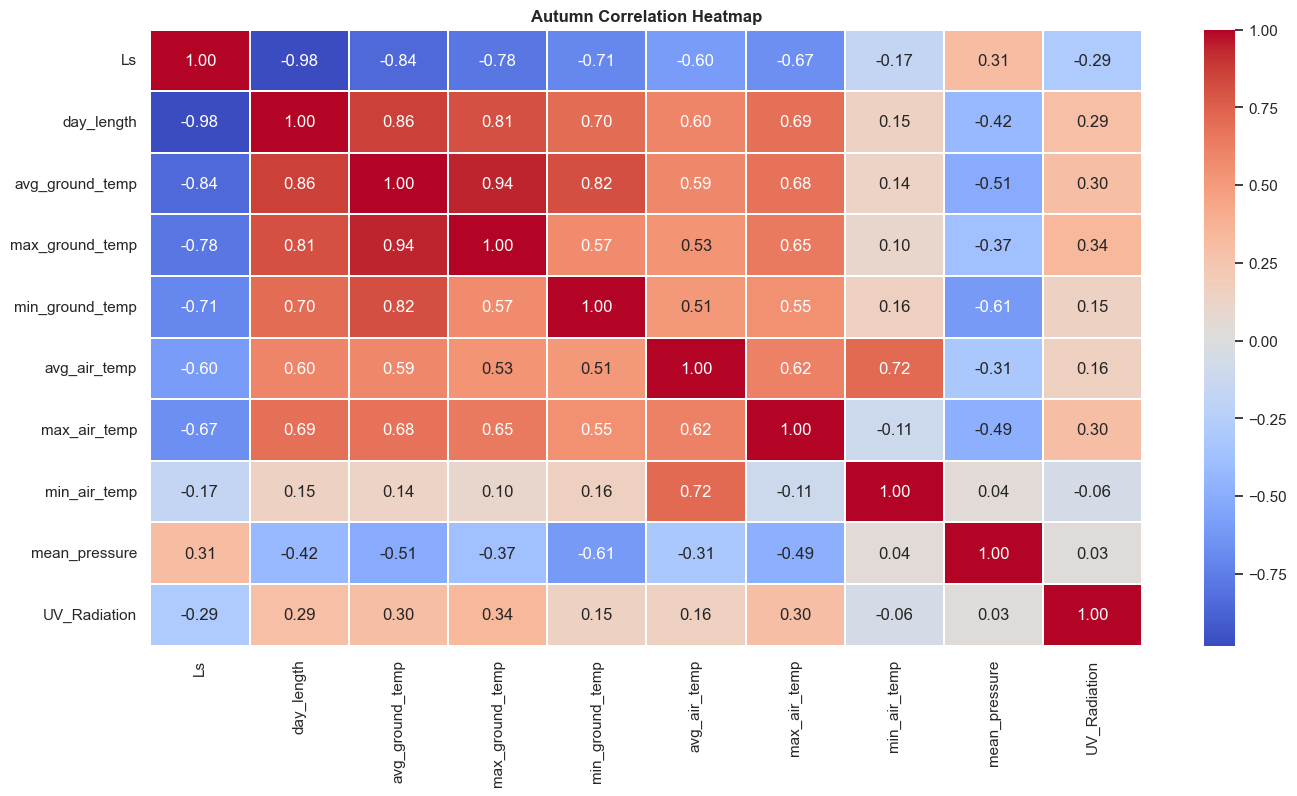

In [30]:
corr_autumn = mars_df[mars_df['mars_season'] == 'autumn'][features].corr()
sns.heatmap(corr_autumn, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Autumn Correlation Heatmap', weight='bold')
plt.show()

### 7.3 Comments on Correlation

Pressure appears most correlated with average temperatures during summer and winter months. This is supported by the autocorrelation analysis for pressure which indicates a bimodal seasonal trend. Interestingly, during winter pressure is negatively correlated while in summer it is positive. This could be due to ice cap sublimation and condensation during those times of year.  

#### Note
Maker sure to create a function to do the month min/max analysis for a specific feature. Make sure the function is able to account for types of trends (e.g. annual, monthly, seasonal)

### 7.4 Air Temperature Vs. Ground Temperature
Hypothesis: Ground temperature has lower variance and fewer extreme fluctuations than air temperature.

In [31]:
from scipy.stats import levene

df = mars_df
df['mean_temperature'] = df['avg_ground_temp']

df['air_temperature'] = df['avg_air_temp']
df['ground_temperature'] = df['avg_ground_temp']

stat, p = levene(df['ground_temperature'], df['air_temperature'])
print(f"Levene test p-value: {p}")

if p < 0.05:
    print("Variances are significantly different.")
else:
    print("No significant difference in variance.")

Levene test p-value: 0.02660898310716404
Variances are significantly different.


In [32]:
import numpy as np

def count_outliers(series):
    q1, q3 = np.percentile(series, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

air_outliers = count_outliers(df['air_temperature'])
ground_outliers = count_outliers(df['ground_temperature'])

print(f"Air Temp Outliers: {air_outliers}")
print(f"Ground Temp Outliers: {ground_outliers}")

Air Temp Outliers: 8
Ground Temp Outliers: 1


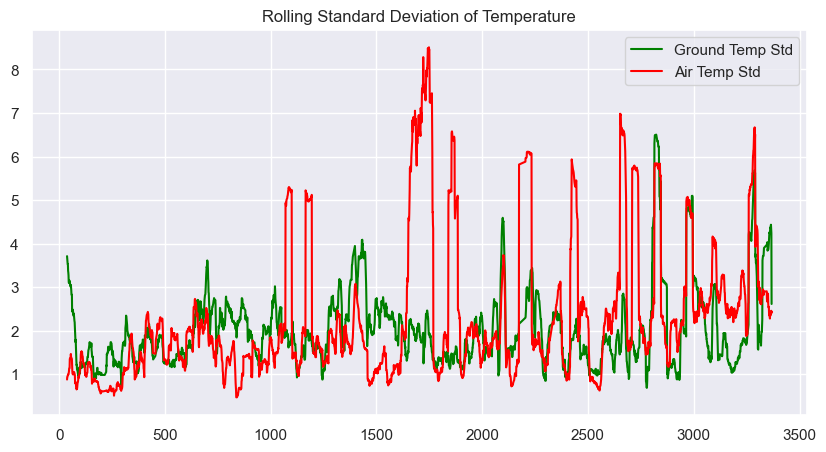

In [33]:
import matplotlib.pyplot as plt

df['ground_std'] = df['ground_temperature'].rolling(window=30).std()
df['air_std'] = df['air_temperature'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(df['ground_std'], label='Ground Temp Std', color='green')
plt.plot(df['air_std'], label='Air Temp Std', color='red')
plt.legend()
plt.title("Rolling Standard Deviation of Temperature")
plt.show()

---

### 7.5 Temperature and Pressure

Hypothesis: There is a significant relationship between mean atmospheric pressure and mean temperature on Mars.

In [34]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df['mean_pressure'], df['mean_temperature'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(df['mean_pressure'], df['mean_temperature'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

# Kendall correlation
kendall_corr, kendall_p = kendalltau(df['mean_pressure'], df['mean_temperature'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Pearson correlation: -0.04134603149037649, p-value: 0.019393807167532116
Spearman correlation: 0.0006147133108251812, p-value: 0.9722842393643044
Kendall correlation: -0.009964458563004755, p-value: 0.4041970620435652


In [35]:
from statsmodels.tsa.stattools import grangercausalitytests

data = df[['mean_temperature', 'mean_pressure']]
max_lags = 5  # Adjust based on ACF/PACF
grangercausalitytests(data, max_lags, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6495  , p=0.1991  , df_denom=3193, df_num=1
ssr based chi2 test:   chi2=1.6510  , p=0.1988  , df=1
likelihood ratio test: chi2=1.6506  , p=0.1989  , df=1
parameter F test:         F=1.6495  , p=0.1991  , df_denom=3193, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9154  , p=0.0543  , df_denom=3190, df_num=2
ssr based chi2 test:   chi2=5.8399  , p=0.0539  , df=2
likelihood ratio test: chi2=5.8346  , p=0.0541  , df=2
parameter F test:         F=2.9154  , p=0.0543  , df_denom=3190, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.6769  , p=0.0007  , df_denom=3187, df_num=3
ssr based chi2 test:   chi2=17.0681 , p=0.0007  , df=3
likelihood ratio test: chi2=17.0227 , p=0.0007  , df=3
parameter F test:         F=5.6769  , p=0.0007  , df_denom=3187, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.7913  , p=0.

C:\Users\Tristan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (1.6494699619969484, 0.1991242622552772, 3193.0, 1),
   'ssr_chi2test': (1.6510197302042742, 0.1988201971783472, 1),
   'lrtest': (1.6505934273682215, 0.1988781817029696, 1),
   'params_ftest': (1.6494699619975863, 0.19912426225517785, 3193.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.915397018003779, 0.054326897336421286, 3190.0, 2),
   'ssr_chi2test': (5.8399332116125855, 0.05393548840243009, 2),
   'lrtest': (5.834602488899691, 0.05407943772221636, 2),
   'params_ftest': (2.9153970180004833, 0.05432689733660834, 3190.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.676900994476521, 0.0007107620746731969, 3187.0, 3),
   'ssr_chi2test': (17.068109610628813, 0.0006843088461730323, 3),
   'lrtest': (17.022667114037176, 0.0006991964519186763, 3),
   'params_ftest': (5.676900994475445, 0.0007107620746741818, 3187.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

## 8. Conclusion